# IMPORTING MODULES

In [26]:
from PIL import Image as img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import random
import math

# Local modules
from extract_data import *
from model import *


## Extracting Data from Images and its Labels

In [27]:
all_data_x,all_data_y,m,n = extract()
all_data_x,all_data_y = shuffle_data(all_data_x,all_data_y,m,n)
train_x,test_x,train_y,test_y,m_train,m_test = divide_train_test(all_data_x,all_data_y,m,n)

In [3]:
print("Numbear of training images:",m_train)
print("Shape of training features:",train_x.shape)
print("Shape of training labels:",train_y.shape)
print("Numbear of testing images:",m_test)
print("Shape of testing features:",test_x.shape)
print("Shape of testing labels:",test_y.shape)

Numbear of training images: 450
Shape of training features: (187501, 450)
Shape of training labels: (1, 450)
Numbear of testing images: 194
Shape of testing features: (187501, 194)
Shape of testing labels: (1, 194)


# Running Gradient descent


Running Gradient Descent with alpha = 0.0002 & #iteration = 1000
Before GD: 307.7145684525061
After 500 iterations cost : 207.15375055999738
After 1000 iterations cost : 169.87096006646374


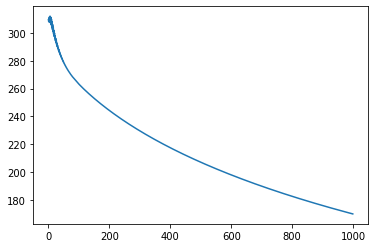

After GD: 169.87096006646374


In [24]:
theta = np.zeros((n,1))+0.000001
alpha = 0.0002
itr = 1000
x = train_x/255
y = train_y
print('Running Gradient Descent with alpha =',alpha,'& #iteration =',itr)
print("Before GD:",J(g(theta.transpose() @ x),y))
theta = gd(theta,x,y,alpha,itr,graph=1,cost=1)
print("After GD:",J(g(theta.transpose() @ x),y))


## Train and Test Accuracy

In [25]:
print(f"Train accuracy : {accuracy(train_x/255,train_y,theta)} %")
print(f"Test accuracy : {accuracy(test_x/255,test_y,theta)} %")

Train accuracy : 90.0 %
Test accuracy : 60.30927835051546 %


## Saving theta to theta.csv

In [23]:
np.savetxt("theta.csv",theta,delimiter=',')

## Alpha VS Cost


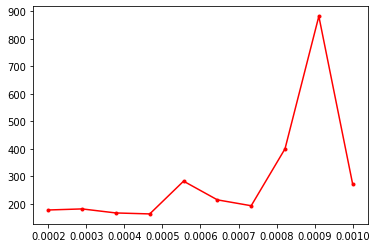

In [7]:
alpha = np.linspace(0.0002,0.001,10)
cost = []
x=train_x/255
y=train_y.copy()
for a in alpha:
    th = np.zeros((n,1))+0.000001
    th = gd(th,x,y,a,10,graph=0)
    cost += [J(g(th.transpose() @ x),y)]
# print(cost)
plt.close()
plt.plot(alpha,cost,'r.-')
plt.show()
